In [11]:
# !pip install scikit-learn

In [12]:
import pandas as pd
pd.options.display.float_format = "{:,.2f}".format

import sys
sys.path.append("../")

from src import soporte_preprocesamiento as sp

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, RobustScaler

In [13]:
df = pd.read_csv("../datos/output/df_sin_nulos.csv", index_col=0)
df_original = df.copy()
df.head()

,price,propertyType,operation,size,exterior,rooms,bathrooms,province,municipality,distance,status,newDevelopment,floor,district,hasLift,parkingSpace
0,750.00,flat,rent,60.00,True,1,1,Madrid,Madrid,7037,good,False,3,Hortaleza,True,desconocido
1,750.00,flat,rent,70.00,True,2,1,Madrid,San Sebastián de los Reyes,16145,good,False,bj,Centro Urbano,False,desconocido
2,400.00,penthouse,rent,67.00,True,2,2,Madrid,Villamanrique de Tajo,55041,good,False,2,desconocido,False,desconocido
3,590.00,flat,rent,70.00,True,3,2,Madrid,Rascafría,56596,good,False,desconocido,desconocido,False,desconocido
4,684.00,studio,rent,45.00,True,0,1,Madrid,Madrid,10656,desconocido,desconocido,desconocido,desconocido,desconocido,desconocido


In [14]:
df["rooms"]=df["rooms"].astype("O")
df["bathrooms"]=df["bathrooms"].astype("O")

In [15]:
escalador_robust = RobustScaler()
datos_transf_robust = escalador_robust.fit_transform(df[["size","distance"]])
df[["size_robust","distance_robust"]] = datos_transf_robust


escalador_min_max = MinMaxScaler()
datos_transf_min_max = escalador_min_max.fit_transform(df[["size","distance"]])
df[["size_MinMax","distance_MinMax"]] = datos_transf_min_max




escalador_norm = Normalizer()
datos_transf_norm = escalador_norm.fit_transform(df[["size","distance"]])
df[["size_norm","distance_norm"]] = datos_transf_norm



escalador_est = StandardScaler()
datos_transf_est = escalador_est.fit_transform(df[["size","distance"]])
df[["size_est", "distance_est"]] = datos_transf_est

df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,353.00,692.93,61.31,400.00,650.00,700.00,740.00,750.00
size,353.00,59.73,23.80,20.00,45.00,57.00,70.00,206.00
distance,353.00,"16,698.82","13,549.50",183.00,"5,656.00","12,321.00","26,558.00","56,596.00"
size_robust,353.00,0.11,0.95,-1.48,-0.48,0.00,0.52,5.96
distance_robust,353.00,0.21,0.65,-0.58,-0.32,0.00,0.68,2.12
size_MinMax,353.00,0.21,0.13,0.00,0.13,0.20,0.27,1.00
distance_MinMax,353.00,0.29,0.24,0.00,0.10,0.22,0.47,1.00
size_norm,353.00,0.01,0.01,0.00,0.00,0.00,0.01,0.14
distance_norm,353.00,1.00,0.00,0.99,1.00,1.00,1.00,1.00
size_est,353.00,0.00,1.00,-1.67,-0.62,-0.11,0.43,6.15


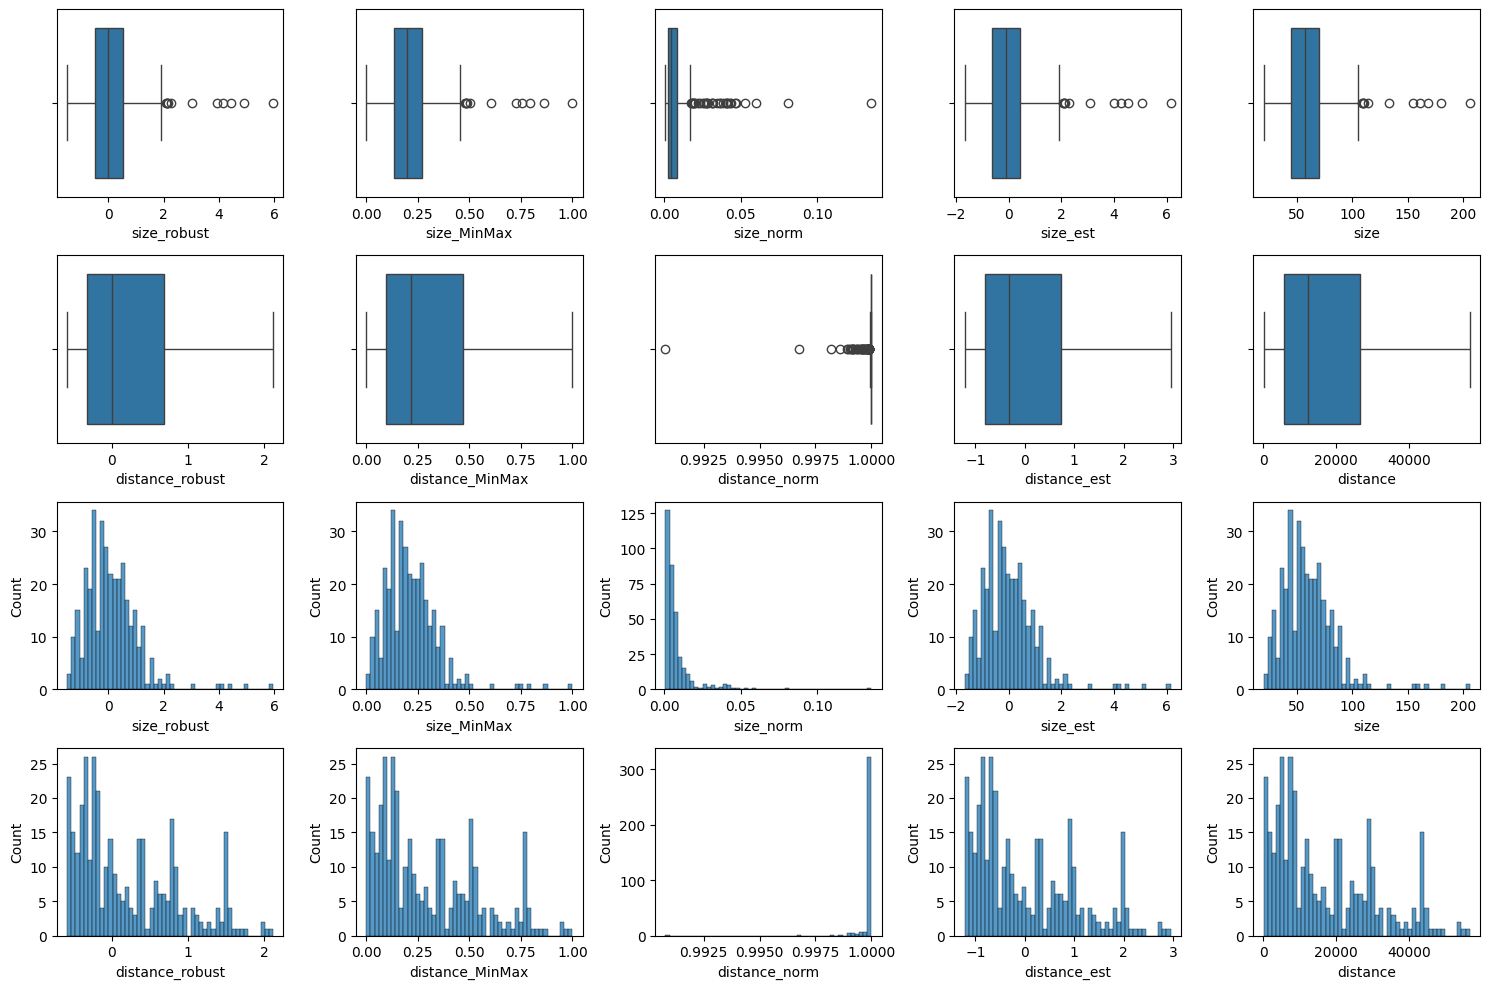

In [16]:
fig , axes = plt.subplots(nrows=4 , ncols=5, figsize = (15, 10) )


sns.boxplot(x = "size_robust", data = df, ax = axes[0][0])
sns.boxplot(x = "size_MinMax", data = df, ax = axes[0][1])
sns.boxplot(x = "size_norm", data = df, ax = axes[0][2])
sns.boxplot(x = "size_est", data = df, ax = axes[0][3])
sns.boxplot(x = "size", data = df, ax = axes[0][4])


sns.boxplot(x = "distance_robust", data = df, ax = axes[1][0])
sns.boxplot(x = "distance_MinMax", data = df, ax = axes[1][1])
sns.boxplot(x = "distance_norm", data = df, ax = axes[1][2])
sns.boxplot(x = "distance_est", data = df, ax = axes[1][3])
sns.boxplot(x = "distance", data = df, ax = axes[1][4])



sns.histplot(x = "size_robust", data = df, ax = axes[2][0],bins=50)
sns.histplot(x = "size_MinMax", data = df, ax = axes[2][1],bins=50)
sns.histplot(x = "size_norm", data = df, ax = axes[2][2],bins=50)
sns.histplot(x = "size_est", data = df, ax = axes[2][3],bins=50)
sns.histplot(x = "size", data = df, ax = axes[2][4],bins=50)


sns.histplot(x = "distance_robust", data = df, ax = axes[3][0],bins=50)
sns.histplot(x = "distance_MinMax", data = df, ax = axes[3][1],bins=50)
sns.histplot(x = "distance_norm", data = df, ax = axes[3][2],bins=50)
sns.histplot(x = "distance_est", data = df, ax = axes[3][3],bins=50)
sns.histplot(x = "distance", data = df, ax = axes[3][4],bins=50)

plt.tight_layout()

In [17]:
df_original[["size_MinMax","distance_MinMax"]] = datos_transf_min_max

In [18]:
df_original.to_csv("../datos/output/df_sin_nulos_min_max.csv")